In [1]:
!pip install pandas matplotlib


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!python -m pip install --upgrade pip

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----------- ---------------------------- 0.5/1.8 MB 424.8 kB/s eta 0:00:03
   ----------- ---------------------------- 0.5/1.8 MB 424.8 kB/s eta 0:00:03
   ----------- ---------------------------- 0.5/1.8 MB 424.8 kB/s eta 0:00:03
   ----------------- ---------------------- 0.8/1.8 MB 393.2 kB/s eta 0:00:03
   ----------------- ---------------------- 0.8/1.8 MB 393.2 kB/s eta 0:00:03
   ----------------- ---------------------- 0.8/1.8 MB 393.2 kB/s eta 0:00:03
   ----------------------- ---------------- 1.0/1.8 MB 420.9 kB/s eta 0:00:02
   ----------------------- -------------

In [4]:
import pandas as pd

# Load your CSV file
df = pd.read_csv("sales_data.csv")

# Preview first 5 rows
df.head()


,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,03-02-2023,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,21-04-2023,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,21-09-2023,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,24-08-2023,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,24-03-2023,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie


In [5]:
import sqlite3

# Connect to SQLite (creates file if not exists)
conn = sqlite3.connect("sales_data.db")

# Save CSV data into a table called 'sales'
df.to_sql("sales", conn, if_exists="replace", index=False)

print("CSV data successfully saved into SQLite database!")


CSV data successfully saved into SQLite database!


In [6]:
import pandas as pd

query = """
SELECT Product_Category AS product,
       SUM(Quantity_Sold) AS total_qty,
       SUM(Quantity_Sold * Unit_Price) AS revenue
FROM sales
GROUP BY Product_Category
ORDER BY revenue DESC;
"""

result_df = pd.read_sql_query(query, conn)

# Show the result
result_df


,product,total_qty,revenue
0,Clothing,6922,19286733.93
1,Furniture,6729,18330280.56
2,Electronics,6096,17571040.57
3,Food,5608,15141885.65


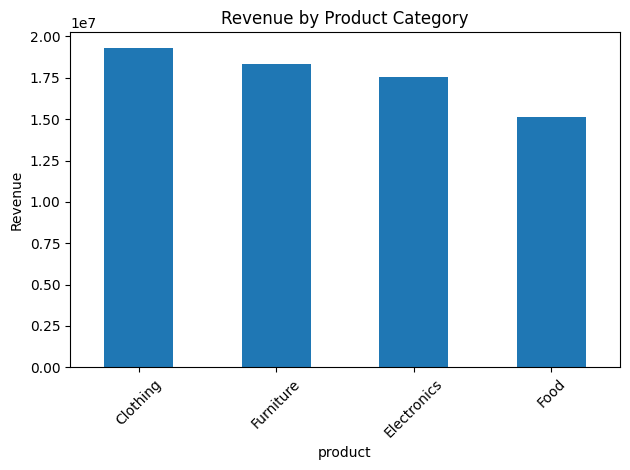

In [7]:
import matplotlib.pyplot as plt

result_df.plot(kind="bar", x="product", y="revenue", legend=False)
plt.title("Revenue by Product Category")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("sales_chart.png")  # saves the chart
plt.show()

In [8]:
query_overall = """
SELECT 
    SUM(Quantity_Sold) AS total_quantity_sold,
    SUM(Quantity_Sold * Unit_Price) AS total_revenue
FROM sales;
"""

overall_df = pd.read_sql_query(query_overall, conn)

# Display the result
print("Overall Sales Summary:")
print(overall_df)


Overall Sales Summary:
   total_quantity_sold  total_revenue
0                25355    70329940.71


In [10]:
conn = sqlite3.connect("sales_data.db")
df.to_sql("sales", conn, if_exists="replace", index=False)
conn.close()